# Leather Limited

Leather Limited manufactures two types of belts, the regular model and the deluxe model. Each type requires 1 sq. yard of leather. A regular belt requires 1 hour of skilled labor and a deluxe belt requires 2 hours.  Each week, 40 sq. yards of leather and 60 hours of skilled labor are available.  Each regular belt generates 3 dollars of profit and each deluxe belt generates 4 dollars.  How many regular belts, $x$, and deluxe belts, $y$ should be manufactured to maximize profit?

We need to:

<center> $\max (3x + 4y)$

subject to:

$x + 2y \le60$

$x+y\le40$

$x,y \ge0$

$x, y$ are integers.</center>

In [ ]:
import sys

if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py"
    import colab_helper
    colab_helper.install_idaes()
    colab_helper.install_ipopt()

--2025-08-18 21:40:08--  https://raw.githubusercontent.com/IDAES/idaes-pse/main/scripts/colab_helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5459 (5.3K) [text/plain]
Saving to: ‘colab_helper.py.1’

colab_helper.py.1   100%[===================>]   5.33K  --.-KB/s    in 0s      

2025-08-18 21:40:08 (56.8 MB/s) - ‘colab_helper.py.1’ saved [5459/5459]

idaes was found! No need to install.


In [ ]:
import pyomo.environ as pyo
from pyomo.environ import *

In [ ]:
x = pyo.Var(domain=NonNegativeIntegers)
y = pyo.Var(domain=NonNegativeIntegers)

In [ ]:
model = pyo.ConcreteModel()
model.x = x
model.y = y

In [ ]:
model.obj = pyo.Objective(expr = 3*x+4*y, sense=maximize)

In [ ]:
model.C1 = pyo.Constraint(expr = x + 2*y <= 60)
model.C2 = pyo.Constraint(expr = x + y <= 40)

In [ ]:
opt = pyo.SolverFactory('ipopt')
opt.solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.019365549087524414}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [ ]:
x_value = pyo.value(x)
y_value = pyo.value(y)
print("x =", x_value)
print("y =", y_value)

x = 20.000000199999914
y = 20.000000198747088


# Dakota Furniture Company

Resource | Desk | Table | Chair
---------|------|-------|-------
Lumber (ft)|8|6|1
Finishing Hours|4|2|1.5
Carpentry Hours |2|1.5|0.5

$x$ is number desks, $y$ the number of tables, and $z$ is the number of chairs. Want to maximize revenue.


<center> $\large\max(60x+30y+20z)$

Subject to:

$8x+6y+z\le48$

$4x+2y+1.5z\le20$

$2x+1.5y+0.5z\le8$

$y \le 5$

$x,y,z$ all integers</center>



In [ ]:
x = pyo.Var(domain=NonNegativeIntegers)
y = pyo.Var(domain=NonNegativeIntegers)
z = pyo.Var(domain=NonNegativeIntegers)

In [ ]:
model = pyo.ConcreteModel()
model.x = x
model.y = y
model.z = z

In [ ]:
model.obj = pyo.Objective(expr = 60*x+30*y+20*z, sense=maximize)

In [ ]:
model.C1 = pyo.Constraint(expr = 8*x + 6*y + z <= 48)
model.C2 = pyo.Constraint(expr = 4*x + 2*y + 1.5*z<= 20)
model.C3 = pyo.Constraint(expr = 2*x + 1.5*y + 0.5*z <= 8)
model.C4 = pyo.Constraint(expr = y <= 5)

In [ ]:
opt = pyo.SolverFactory('ipopt')
opt.solve(model,tee=True)

Ipopt 3.13.2: 
==> Warning: Treating 0 binary and 3 integer variables as continous.


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of For

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 4, 'Number of variables': 3, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.13.2\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.021405458450317383}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [ ]:
x_value = pyo.value(x)
y_value = pyo.value(y)
z_value = pyo.value(z)
print("x =", x_value)
print("y =", y_value)
print("z =", z_value)
print("objective = ", pyo.value(model.obj))

x = 2.0000000316228568
y = 0.0
z = 8.000000061503654
objective =  280.0000031274445


# Powerco Electric Power Plant Optimization

Importing parameters from a file.

From|City 1|City 2|City 3|City 4|Supply (kWhr)
----|------|------|------|------|-------------
plant1|\$8|\$6|\$10|\$9|35
plant2|\$9|\$12|\$13|\$7|50
plant3|\$14|\$9|\$16|\$5|40
Demand|45|20|30|30

<center> $\large \min \sum_{j}\sum_{i}P_{i,j}\times x_{i,j}\space\space s.t.$

$\sum_{j}x_{1,j} \le S_1,\sum_{j}x_{2,j} \le S_1,\sum_{j}x_{3,j} \le S_3$,

$\sum_{i}x_{i,1}\ge D_1,\sum_{i}x_{i,2}\ge D_2,\sum_{i}x_{i,3}\ge D_3\sum_{i}x_{i,4}\ge D_4$

$x_{i,j} \ge 0$

$i=1,2,3\space\space j=1,2,3,4$

In [ ]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/Optimization with Python/Exercises/powerco.xlsx')

# Read each sheet
cost_df = xls.parse('Cost', header=None)
gen_df = xls.parse('Generation', header=None)
dem_df = xls.parse('Demand', header=None)

# Extract sets
generators = gen_df.iloc[:, 0].tolist()  # Generator indices
capacities = gen_df.iloc[:, 1].tolist() # Capacities

cities = dem_df.iloc[:, 0].tolist()      # City indices
demands = dem_df.iloc[:, 1].tolist()    # Demands

# Cost matrix: rows = generators, columns = cities
cost_matrix = cost_df.values

In [ ]:
generators

[1, 2, 3]

In [ ]:
capacities

[35, 50, 40]

In [ ]:
cities

[1, 2, 3, 4]

In [ ]:
demands

[45, 20, 30, 30]

In [ ]:
cost_matrix

array([[ 8,  6, 10,  9],
       [ 9, 12, 13,  7],
       [14,  9, 16,  5]])

In [ ]:
from pyomo.environ import *

model = ConcreteModel()

# Sets
model.G = Set(initialize=generators)  # Generators
model.C = Set(initialize=cities)      # Cities

# Parameters
model.capacity = Param(model.G, initialize=dict(zip(generators, capacities)))
model.demand = Param(model.C, initialize=dict(zip(cities, demands)))

# Cost parameter: (g, c) → cost
cost_dict = {(generators[i], cities[j]): cost_matrix[i][j]
             for i in range(len(generators)) for j in range(len(cities))}
model.cost = Param(model.G, model.C, initialize=cost_dict)


In [ ]:
# x[g, c] = kW delivered from generator g to city c
model.x = Var(model.G, model.C, domain=NonNegativeReals)

Objective Function

In [ ]:
def total_cost(model):
    return sum(model.cost[g, c] * model.x[g, c] for g in model.G for c in model.C)

model.obj = Objective(rule=total_cost, sense=minimize)

Generator Capacity Constraints

In [ ]:
def capacity_constraint(model, g):
    return sum(model.x[g, c] for c in model.C) <= model.capacity[g]

model.capacity_con = Constraint(model.G, rule=capacity_constraint)


City Demand Requirements

In [ ]:
def demand_constraint(model, c):
    return sum(model.x[g, c] for g in model.G) >= model.demand[c]

model.demand_con = Constraint(model.C, rule=demand_constraint)


In [ ]:
solver = SolverFactory('ipopt')  # or 'cbc', 'gurobi', etc.
results = solver.solve(model)

# Display results
for g in model.G:
    for c in model.C:
        print(f"Power from Generator {g} to City {c}: {model.x[g, c].value:.2f} kW")

print(f"Total Cost: ${model.obj():.2f}")


Power from Generator 1 to City 1: 0.00 kW
Power from Generator 1 to City 2: 10.00 kW
Power from Generator 1 to City 3: 25.00 kW
Power from Generator 1 to City 4: 0.00 kW
Power from Generator 2 to City 1: 45.00 kW
Power from Generator 2 to City 2: 0.00 kW
Power from Generator 2 to City 3: 5.00 kW
Power from Generator 2 to City 4: 0.00 kW
Power from Generator 3 to City 1: 0.00 kW
Power from Generator 3 to City 2: 10.00 kW
Power from Generator 3 to City 3: 0.00 kW
Power from Generator 3 to City 4: 30.00 kW
Total Cost: $1020.00


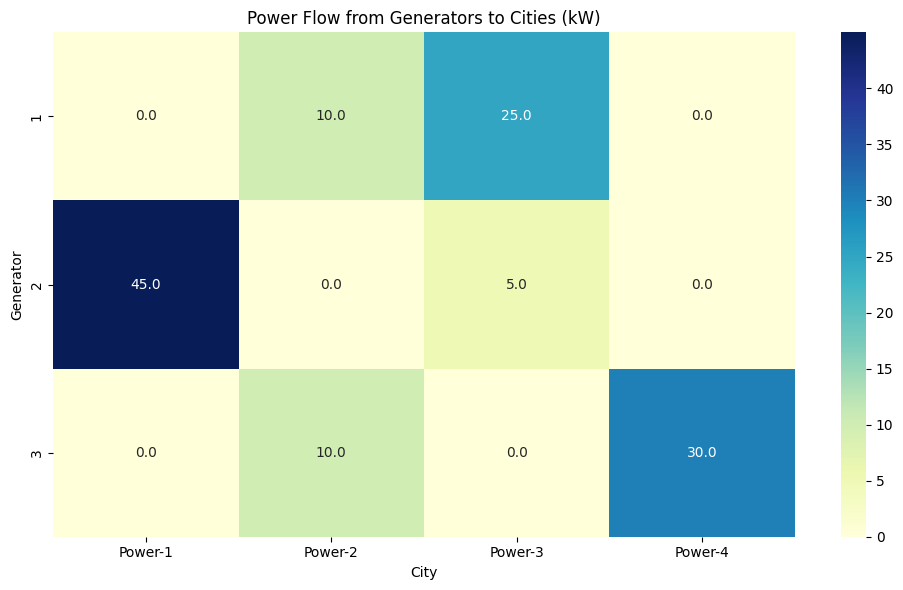

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame of results
flow_data = {(g, c): model.x[g, c].value for g in model.G for c in model.C}
flow_df = pd.DataFrame.from_dict(flow_data, orient='index', columns=['Power'])
flow_df.index = pd.MultiIndex.from_tuples(flow_df.index, names=['Generator', 'City'])
flow_df = flow_df.unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(flow_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Power Flow from Generators to Cities (kW)")
plt.ylabel("Generator")
plt.xlabel("City")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Prepare Sankey data
sources = []
targets = []
values = []
labels = [f"G{g}" for g in model.G] + [f"C{c}" for c in model.C]

for g in model.G:
    for c in model.C:
        val = model.x[g, c].value
        if val > 0:
            sources.append(generators.index(g))
            targets.append(len(generators) + cities.index(c))
            values.append(val)

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(source=sources, target=targets, value=values)
)])
fig.update_layout(title_text="Power Distribution Sankey Diagram", font_size=10)
fig.show()


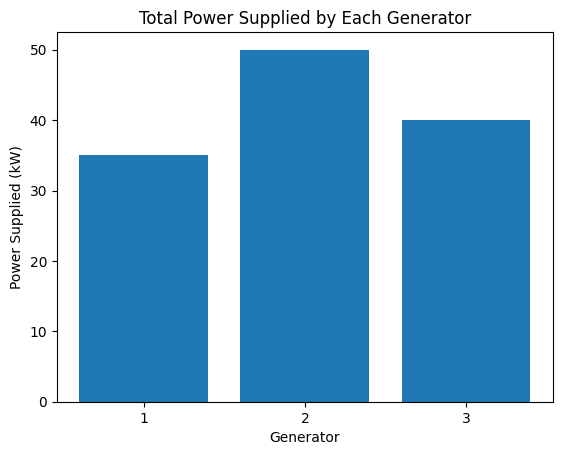

In [ ]:


# Calculate total power supplied by each generator
gen_usage = {g: sum(model.x[g, c].value for c in model.C) for g in model.G}
plt.bar(gen_usage.keys(), gen_usage.values())
plt.title("Total Power Supplied by Each Generator")
plt.xlabel("Generator")
plt.xticks(generators)
plt.ylabel("Power Supplied (kW)")
plt.show()